---
title: "Modeling for Predicting Music Genre"
subtitle: "DSAN 5300 Final Project"
authors: ["Jorge Bris Moreno", "William McGloin", "Kangheng Liu", "Isfar Baset"]
date: last-modified
date-format: long
format:
  html:
    self-contained: true
    toc: true
    code-overflow: wrap
    code-fold: true
---

## Load and Display Data

In [2]:
import pandas as pd

# Load the dataset
file_path = '../data/clean_data/artists.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary statistics of the dataset
data.head(), data.describe(include='all'), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       397 non-null    object 
 1   artist_id         397 non-null    object 
 2   danceability      397 non-null    float64
 3   energy            397 non-null    float64
 4   loudness          397 non-null    float64
 5   speechiness       397 non-null    float64
 6   acousticness      397 non-null    float64
 7   instrumentalness  397 non-null    float64
 8   liveness          397 non-null    float64
 9   valence           397 non-null    float64
 10  tempo             397 non-null    float64
 11  duration_ms       397 non-null    float64
 12  key_mode          397 non-null    object 
 13  genre1            395 non-null    object 
 14  genre2            76 non-null     object 
 15  genre3            12 non-null     object 
dtypes: float64(10), object(6)
memory usage: 49.8

(         artist_name               artist_id  danceability    energy  \
 0          Green Day  7oPftvlwr6VrsViSDV7fJY      0.435219  0.895942   
 1  Dusty Springfield  5zaXYwewAXedKNCff45U5l      0.485341  0.498333   
 2             Hozier  2FXC3k01G6Gw61bmprjgqS      0.448021  0.516437   
 3    Ms. Lauryn Hill  2Mu5NfyYm8n5iTomuKAEHl      0.652385  0.493627   
 4            Incubus  3YcBF2ttyueytpXtEzn1Za      0.508414  0.786576   
 
     loudness  speechiness  acousticness  instrumentalness  liveness   valence  \
 0  -4.404705     0.071970      0.029052          0.024207  0.210100  0.658430   
 1 -10.186623     0.043030      0.518770          0.015247  0.222696  0.565521   
 2  -7.487792     0.046327      0.384334          0.048719  0.136029  0.339523   
 3 -12.291385     0.302931      0.270838          0.000417  0.258950  0.610846   
 4  -6.192253     0.057951      0.080398          0.076196  0.181052  0.432140   
 
         tempo    duration_ms  key_mode genre1 genre2 genre3  
 0 

## Preprocessing Steps

In [3]:
# Drop genre2 and genre3 columns
data_cleaned = data.drop(['genre2', 'genre3'], axis=1)

# Drop rows with missing 'genre1'
data_cleaned = data_cleaned.dropna(subset=['genre1'])

# Encoding categorical variable 'key_mode' using one-hot encoding
data_cleaned = pd.get_dummies(data_cleaned, columns=['key_mode'])

# Check the modified dataset
data_cleaned.head(), data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 396
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   artist_name        395 non-null    object 
 1   artist_id          395 non-null    object 
 2   danceability       395 non-null    float64
 3   energy             395 non-null    float64
 4   loudness           395 non-null    float64
 5   speechiness        395 non-null    float64
 6   acousticness       395 non-null    float64
 7   instrumentalness   395 non-null    float64
 8   liveness           395 non-null    float64
 9   valence            395 non-null    float64
 10  tempo              395 non-null    float64
 11  duration_ms        395 non-null    float64
 12  genre1             395 non-null    object 
 13  key_mode_A major   395 non-null    uint8  
 14  key_mode_A minor   395 non-null    uint8  
 15  key_mode_A# major  395 non-null    uint8  
 16  key_mode_A# minor  395 non

(         artist_name               artist_id  danceability    energy  \
 0          Green Day  7oPftvlwr6VrsViSDV7fJY      0.435219  0.895942   
 1  Dusty Springfield  5zaXYwewAXedKNCff45U5l      0.485341  0.498333   
 2             Hozier  2FXC3k01G6Gw61bmprjgqS      0.448021  0.516437   
 3    Ms. Lauryn Hill  2Mu5NfyYm8n5iTomuKAEHl      0.652385  0.493627   
 4            Incubus  3YcBF2ttyueytpXtEzn1Za      0.508414  0.786576   
 
     loudness  speechiness  acousticness  instrumentalness  liveness   valence  \
 0  -4.404705     0.071970      0.029052          0.024207  0.210100  0.658430   
 1 -10.186623     0.043030      0.518770          0.015247  0.222696  0.565521   
 2  -7.487792     0.046327      0.384334          0.048719  0.136029  0.339523   
 3 -12.291385     0.302931      0.270838          0.000417  0.258950  0.610846   
 4  -6.192253     0.057951      0.080398          0.076196  0.181052  0.432140   
 
    ...  key_mode_E major  key_mode_E minor key_mode_F major  key_

## Split the Data: Divide the dataset into training and testing sets

In [4]:
from sklearn.model_selection import train_test_split

# Defining the features and target
X = data_cleaned.drop(['artist_name', 'artist_id', 'genre1'], axis=1)
y = data_cleaned['genre1']

# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316, 34), (79, 34), (316,), (79,))

## Try Different Classification Methods

### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create a Logistic Regression classifier
log_reg_classifier = LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr')

# Train the classifier
log_reg_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_lr = log_reg_classifier.predict(X_test)

# Evaluate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

# Print accuracy
print(f"Accuracy of the model: {accuracy_lr:.2f}\n")

# Print classification report
print("Classification Report:")
print(report_lr)

Accuracy of the model: 0.09

Classification Report:
              precision    recall  f1-score   support

     country       0.00      0.00      0.00        17
         edm       0.00      0.00      0.00         7
        funk       0.06      0.43      0.10         7
     hip hop       0.00      0.00      0.00         8
        jazz       0.15      0.44      0.23         9
       latin       0.00      0.00      0.00         9
         pop       0.00      0.00      0.00         6
        rock       0.00      0.00      0.00         8
        soul       0.00      0.00      0.00         8

    accuracy                           0.09        79
   macro avg       0.02      0.10      0.04        79
weighted avg       0.02      0.09      0.03        79



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

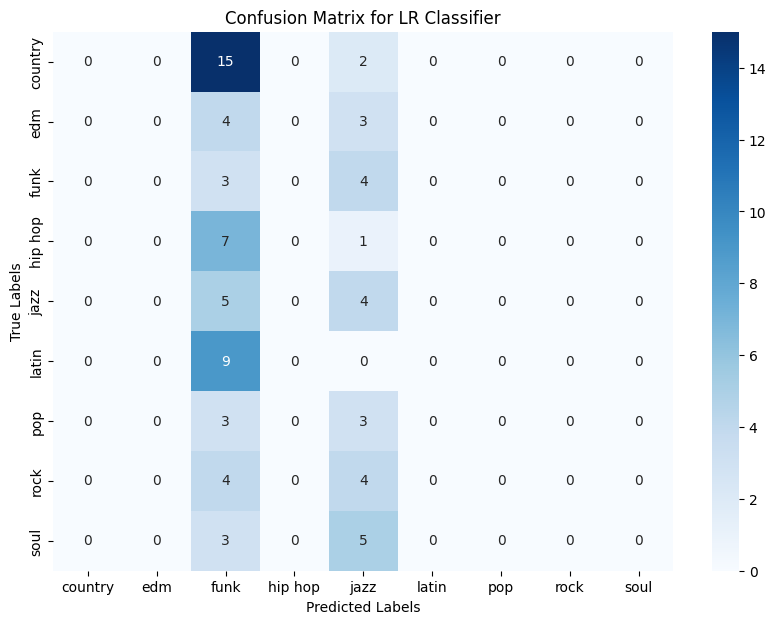

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for LR Classifier')
plt.show()

### Support Vector Machine (SVM)

In [10]:
from sklearn.svm import SVC

# Create a Support Vector Classifier with a linear kernel
svm_classifier = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

# Print accuracy
print(f"Accuracy of the model: {accuracy_svm:.2f}\n")

# Print classification report
print("Classification Report:")
print(report_svm)

Accuracy of the model: 0.18

Classification Report:
              precision    recall  f1-score   support

     country       0.00      0.00      0.00        17
         edm       0.13      0.57      0.21         7
        funk       0.00      0.00      0.00         7
     hip hop       0.00      0.00      0.00         8
        jazz       0.26      0.89      0.40         9
       latin       0.17      0.11      0.13         9
         pop       0.00      0.00      0.00         6
        rock       0.25      0.12      0.17         8
        soul       0.00      0.00      0.00         8

    accuracy                           0.18        79
   macro avg       0.09      0.19      0.10        79
weighted avg       0.09      0.18      0.10        79



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

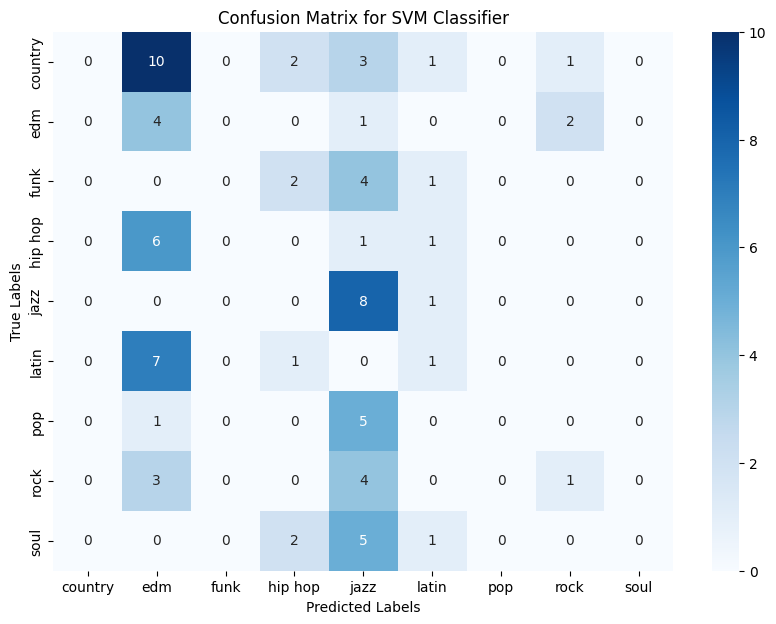

In [15]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

### Linear Discriminant Analysis (LDA)

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Linear Discriminant Analysis classifier
lda_classifier = LinearDiscriminantAnalysis()

# Train the classifier
lda_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_lda = lda_classifier.predict(X_test)

# Evaluate accuracy
accuracy_lda = accuracy_score(y_test, y_pred_lda)
report_lda = classification_report(y_test, y_pred_lda)

# Print accuracy
print(f"Accuracy of the model: {accuracy_lda:.2f}\n")

# Print classification report
print("Classification Report:")
print(report_lda)

Accuracy of the model: 0.47

Classification Report:
              precision    recall  f1-score   support

     country       0.67      0.59      0.62        17
         edm       0.71      0.71      0.71         7
        funk       0.00      0.00      0.00         7
     hip hop       0.38      0.62      0.48         8
        jazz       0.60      0.67      0.63         9
       latin       0.56      0.56      0.56         9
         pop       0.33      0.33      0.33         6
         rap       0.00      0.00      0.00         0
        rock       0.40      0.50      0.44         8
        soul       0.00      0.00      0.00         8

    accuracy                           0.47        79
   macro avg       0.37      0.40      0.38        79
weighted avg       0.44      0.47      0.45        79



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print accuracy
print(f"Accuracy of the model: {accuracy:.2f}\n")

# Print classification report
print("Classification Report:")
print(report)

Accuracy of the model: 0.57

Classification Report:
              precision    recall  f1-score   support

     country       0.83      0.59      0.69        17
         edm       0.56      0.71      0.63         7
        funk       0.50      0.57      0.53         7
     hip hop       0.55      0.75      0.63         8
        jazz       0.45      0.56      0.50         9
       latin       0.75      0.67      0.71         9
         pop       0.33      0.17      0.22         6
        rock       0.50      0.50      0.50         8
        soul       0.44      0.50      0.47         8

    accuracy                           0.57        79
   macro avg       0.55      0.56      0.54        79
weighted avg       0.59      0.57      0.57        79



## Determine Feature Importance

In [8]:
# Get feature importances from the model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to view the feature names and their importance scores
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

features_df.head(10)

,Feature,Importance
3,speechiness,0.120549
0,danceability,0.117873
1,energy,0.097478
5,instrumentalness,0.094388
4,acousticness,0.091299
7,valence,0.088841
2,loudness,0.087203
8,tempo,0.071356
9,duration_ms,0.065798
6,liveness,0.060770
